## Clustering Analysis

#### Project Objective: - Identify clusters of airline passengers that exhibit similar characteristics. 

## Importing libraries

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [348]:
df = pd.read_excel('EastWestAirlines.xlsx')

## EDA

In [351]:
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [353]:
df.shape

(3999, 12)

In [355]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [357]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [359]:
df.duplicated().sum()

0

In [361]:
# Remove unwanted feature

In [363]:
df.drop(columns=['ID#','Award?'],inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [365]:
# Detecting Outliers

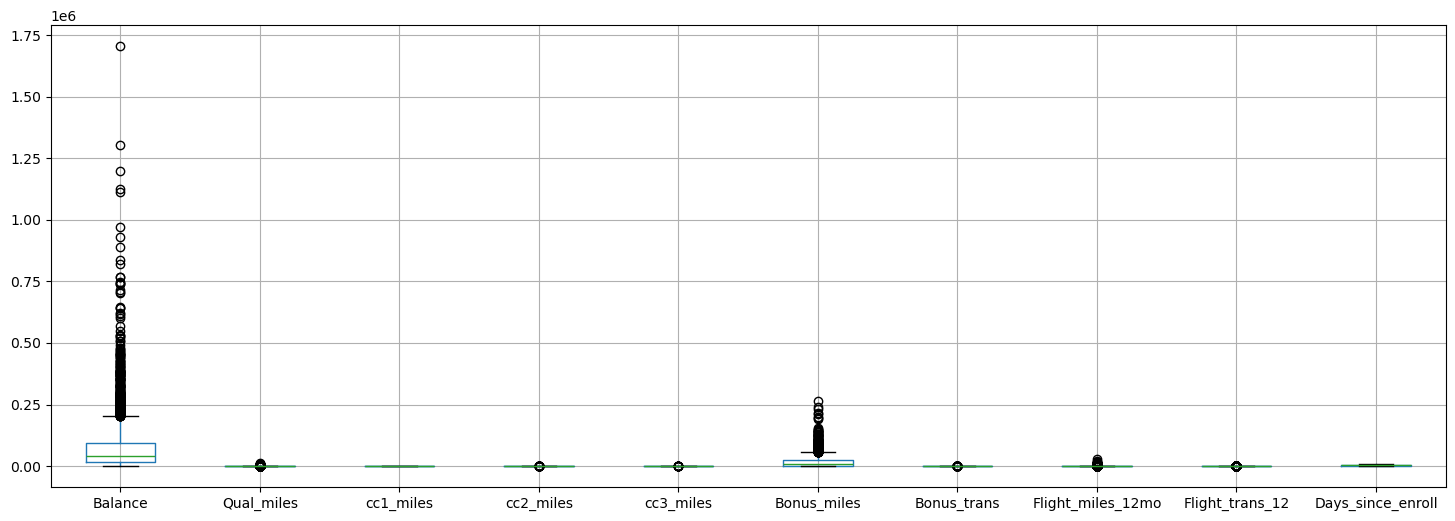

In [367]:
df.boxplot(figsize=(18,6))
plt.show()

In [369]:
# We can prominently see 'Balance', 'Qual_miles', 'Bonus_miles' and 'Flight_miles_12mo' have extreme outliers above the whisker that need to be treated. 

In [371]:
def outlier_Detection(df,columns): 
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

In [373]:
outlier_Detection(df,['Balance', 'Qual_miles', 'Bonus_miles', 'Flight_miles_12mo'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401


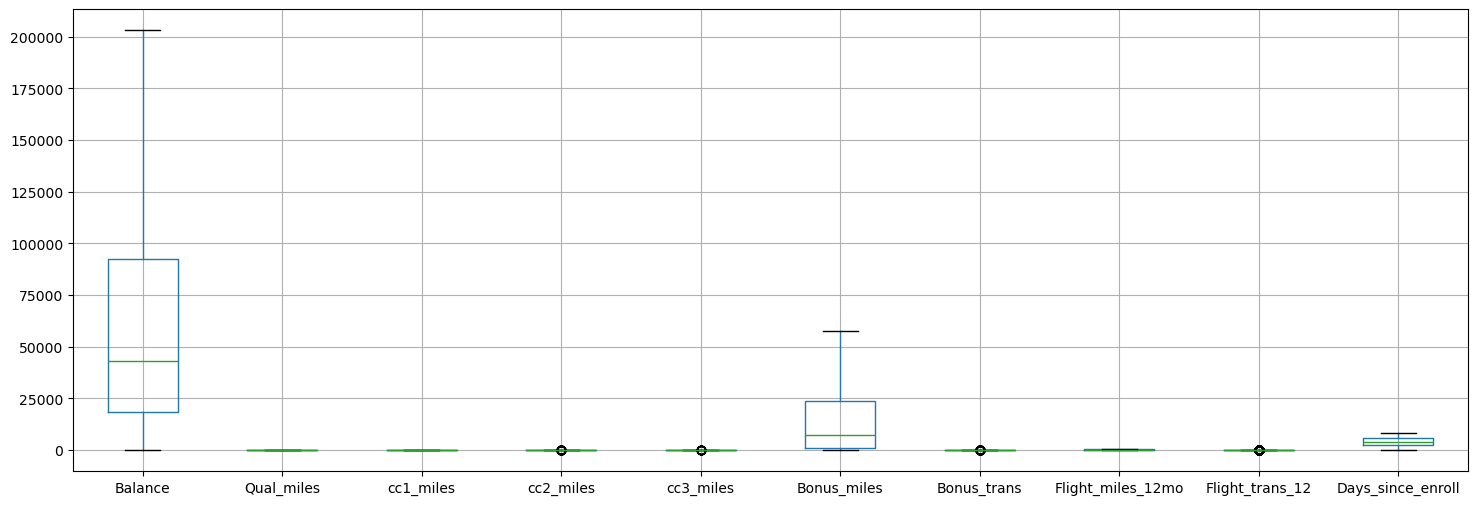

In [375]:
df.boxplot(figsize=(18,6))
plt.show()

In [377]:
# As the data has a wide range of values and have different units, we need to scale the data.

## Feature Scaling

In [380]:
from sklearn.preprocessing import StandardScaler

In [394]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-0.60725829,  0.        , -0.76957841, ..., -0.60431348,
        -0.36216787,  1.39545434],
       [-0.75894657,  0.        , -0.76957841, ..., -0.60431348,
        -0.36216787,  1.37995704],
       [-0.38206963,  0.        , -0.76957841, ..., -0.60431348,
        -0.36216787,  1.41192021],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -0.60431348,
        -0.36216787, -1.31560393],
       [-0.15118775,  0.        , -0.76957841, ...,  1.09266586,
        -0.09850333, -1.31608822],
       [-1.03556163,  0.        , -0.76957841, ..., -0.60431348,
        -0.36216787, -1.31754109]])

# Model Building using various clustering techniques

### 1. K-Means Clustering

In [398]:
from sklearn.cluster import KMeans

In [400]:
# Using wcss (within cluster sum squared values) to find optimal number of clusters (k). 

In [402]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
# append(): This is a list method used to add an element to the end of the list.
# km.inertia_: This attribute of the KMeans object (km) stores the WCSS value for the current clustering solution. It represents the 
# sum of squared distances of samples to their closest cluster center.

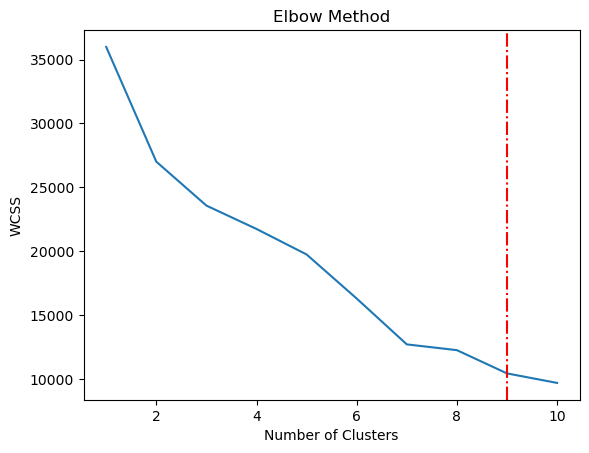

In [701]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.axvline(x = 9, linestyle = '-.', color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [410]:
# From above Elbow graph, let's experiment with number of clusters, (k) = 9

In [983]:
km=KMeans(n_clusters=9)
y_pred = km.fit_predict(x)
y_pred

array([4, 4, 4, ..., 1, 3, 3])

In [985]:
km.cluster_centers_

array([[ 1.06636101e+00,  0.00000000e+00,  1.29279455e-01,
        -9.82418871e-02, -6.27665798e-02,  7.07260547e-01,
         2.31167367e+00,  2.03448940e+00,  5.34287359e+00,
         3.40639342e-01],
       [-1.34098646e-01,  0.00000000e+00,  5.19978225e-01,
        -9.82418871e-02, -6.27665798e-02,  1.63649495e-01,
         5.20583275e-01, -4.56673852e-01, -3.15771964e-01,
        -2.57819232e-01],
       [ 2.39285086e-01,  0.00000000e+00, -6.37235012e-01,
        -9.82418871e-02, -6.27665798e-02, -4.37654143e-01,
        -1.83807961e-01,  1.75258949e+00,  7.46116971e-01,
        -6.84371438e-03],
       [-6.37929925e-01,  0.00000000e+00, -7.48443106e-01,
        -9.82418871e-02, -6.27665798e-02, -7.20492996e-01,
        -7.39529762e-01, -5.02195159e-01, -3.20994261e-01,
        -9.66075355e-01],
       [-3.07834453e-01,  0.00000000e+00, -6.62684951e-01,
        -9.82418871e-02, -5.65874224e-02, -6.47421415e-01,
        -5.97065225e-01, -5.10740118e-01, -3.24001712e-01,
         8.

In [987]:
df['cluster'] = y_pred

In [989]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,4
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,4
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,4
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,4
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,8
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,3
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,3
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,1
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,3


In [991]:
df.groupby('cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
0,126328.159375,0.0,2.237500,1.000000,1.000000,28192.678125,33.800000,777.500000,21.637500,4821.937500
1,55876.753219,0.0,2.782546,1.000000,1.000000,18453.490701,16.609442,43.500715,0.175966,3588.064378
2,77806.621822,0.0,1.182203,1.000000,1.000000,7501.237818,9.836864,694.440678,4.203390,4104.427966
3,26452.462004,0.0,1.030010,1.000000,1.000000,2393.507260,4.516941,30.030010,0.155857,2125.077444
4,45709.107660,0.0,1.147165,1.000000,1.001206,3710.224367,5.868516,27.570567,0.144753,5875.353438
5,118221.978240,0.0,4.172147,1.000000,1.003868,42900.202128,17.965184,30.686654,0.197292,5344.676983
6,102441.716667,0.0,3.466667,1.000000,4.066667,55485.600000,28.066667,298.833333,1.600000,4613.866667
7,55181.470930,0.0,1.139535,2.348837,1.000000,14409.773256,17.534884,208.906977,2.209302,3968.930233


In [993]:
df['cluster'].value_counts()

cluster
3    1033
4     829
1     699
5     517
2     472
8     311
0      80
7      43
6      15
Name: count, dtype: int64

In [995]:
from sklearn.metrics import silhouette_score

In [997]:
silhouette_score(x,y_pred)

0.26536860324225714

In [999]:
df.drop(columns=['cluster'],inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401


In [1001]:
# The silhouette score ranges from -1 to +1, with higher values indicating better clustering.

# +1: Indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters.
#  0: Indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
# -1: Indicates that the data point is probably assigned to the wrong cluster.


# General Guidelines:

# 0.71-1.00: A strong structure has been found.
# 0.51-0.70: A reasonable structure has been found.
# 0.26-0.50: The structure is weak and could be artificial.
# < 0.25: No substantial structure has been found.

In [1003]:
# Since, we achieved only 0.2653 on silhouette score for k = 9, we can say we found out a weak clustering structure. 

In [1005]:
# Experimenting with number of clusters = 8, to check if we get better silhouette score

In [1007]:
km=KMeans(n_clusters=8)
y_pred = km.fit_predict(x)
y_pred

array([2, 2, 2, ..., 1, 0, 0])

In [1009]:
df['cluster'] = y_pred
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,2
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,2
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,2
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,2
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,5
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,0
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,0
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,1
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [1011]:
df.groupby('cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
0,27312.803738,0.0,1.070093,1.000000,1.000000,2795.838318,5.392523,31.629907,0.158879,2076.019626
1,68773.814675,0.0,3.087007,1.000000,1.001160,22515.145302,16.403712,34.762181,0.158933,4265.155452
2,42603.789442,0.0,1.096085,1.000000,1.001186,3275.056940,5.548043,30.078292,0.145907,5754.041518
3,124929.290865,0.0,2.519231,1.000000,1.000000,30749.817308,33.865385,777.500000,19.259615,4926.336538
4,102441.716667,0.0,3.466667,1.000000,4.066667,55485.600000,28.066667,298.833333,1.600000,4613.866667
5,129285.672535,0.0,4.403169,1.000000,1.001761,48516.729313,20.938380,323.160211,1.566901,5164.890845
6,81481.203441,0.0,1.299595,1.000000,1.000000,8622.771761,10.564777,698.378543,4.151822,4120.825911
7,55181.470930,0.0,1.139535,2.348837,1.000000,14409.773256,17.534884,208.906977,2.209302,3968.930233


In [1013]:
df['cluster'].value_counts()

cluster
0    1070
1     862
2     843
5     568
6     494
3     104
7      43
4      15
Name: count, dtype: int64

In [1015]:
silhouette_score(x,y_pred)

0.2589393705792362

In [1017]:
# We can see we did not achieve any better results with number of cluster, k = 8

In [1019]:
df.drop(columns=['cluster'],inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401


In [1021]:
# Experimenting with number of clusters = 7

In [1023]:
km=KMeans(n_clusters=7)
y_pred = km.fit_predict(x)
y_pred

array([1, 1, 1, ..., 0, 3, 1])

In [1025]:
df['cluster'] = y_pred
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,1
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,1
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,1
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,1
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,4
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,1
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,1
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,3


In [1027]:
df.groupby('cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
0,73440.437756,0.0,2.783811,1.000000,1.001025,18988.969262,15.811475,32.453893,0.149590,4540.270492
1,28450.031883,0.0,1.042908,1.000000,1.000000,2591.283671,4.802741,13.230036,0.092968,3484.780691
2,129561.479167,0.0,2.916667,1.000000,1.000000,36869.700000,38.633333,777.500000,23.316667,4879.166667
3,62016.025641,0.0,1.114219,1.000000,1.000000,5409.527389,7.172494,629.205128,2.892774,3888.202797
4,124181.882653,0.0,4.425170,1.000000,1.078231,49649.575255,20.710884,271.989796,1.248299,5073.447279
5,55181.470930,0.0,1.139535,2.348837,1.000000,14409.773256,17.534884,208.906977,2.209302,3968.930233
6,114770.843333,0.0,2.066667,1.000000,1.008889,19554.063333,20.346667,767.455556,7.653333,4785.391111


In [1029]:
df['cluster'].value_counts()

cluster
1    1678
0     976
4     588
3     429
6     225
2      60
5      43
Name: count, dtype: int64

In [1031]:
silhouette_score(x,y_pred)

0.27150470620500616

In [1033]:
# We can see we achieved better silhouette score with k = 7

In [1035]:
# We can see that we achieved slightly better silhouette score of 0.2715 with k = 7 as compared to k = 8 and 9. 
# From elbow graph we can see that there is sharp decline in wcss values until k = 7, hence we will not experiment further 
# with lesser number of clusters. 

In [1037]:
# From the elbow graph and silhouette scores, the optimal number of clusters, k = 7. Although the clustering structure achieved is weak. 

#### Plotting bar graph for k = 7

In [1040]:
cluster_counts = df['cluster'].value_counts().sort_index()

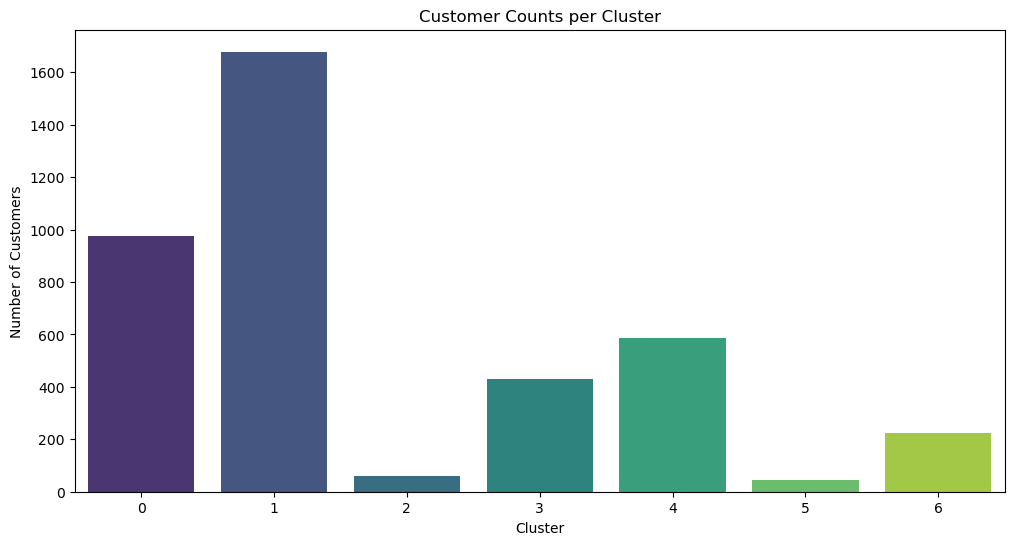

In [1042]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Customer Counts per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [1085]:
# From above bar graph, we can see that clusters 0,1,3 ad 4 cover maximum number of customers (More than 90% of customers)

#### Analyzing clusters

In [1050]:
df[df['cluster']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
6,84914.0,0.0,3,1,1,27482.0,25,0.0,0,6994,0
10,40091.0,0.0,2,1,1,7278.0,10,0.0,0,6959,0
12,43382.0,0.0,2,1,1,11150.0,20,0.0,0,6924,0
18,91473.0,0.0,3,1,1,27408.0,17,0.0,0,6903,0
19,23354.0,0.0,3,1,1,10447.0,5,0.0,0,6896,0
...,...,...,...,...,...,...,...,...,...,...,...
3978,10071.0,0.0,2,1,1,27701.0,16,0.0,0,1421,0
3980,28867.0,0.0,3,1,1,19169.0,28,0.0,0,1425,0
3985,59017.0,0.0,4,1,1,34746.0,25,0.0,0,1418,0
3991,39142.0,0.0,3,1,1,14981.0,28,0.0,0,1408,0


In [1052]:
df[df['cluster']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,1
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,1
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,1
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,1
5,16420.0,0.0,1,1,1,0.0,0,0.0,0,6942,1
...,...,...,...,...,...,...,...,...,...,...,...
3992,11181.0,0.0,1,1,1,929.0,12,0.0,0,1407,1
3993,3974.0,0.0,1,1,1,365.0,3,0.0,0,1397,1
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,1
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,1


In [1054]:
df[df['cluster']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
26,18521.0,0.0,1,1,1,1227.0,2,777.5,2,7917,3
29,19221.0,0.0,1,1,1,4655.0,8,500.0,1,7896,3
36,23193.0,0.0,1,1,1,650.0,4,550.0,3,7861,3
37,68666.0,0.0,1,1,1,350.0,2,350.0,2,7861,3
40,34616.0,0.0,1,1,1,1750.0,4,500.0,1,7850,3
...,...,...,...,...,...,...,...,...,...,...,...
3915,121156.0,0.0,1,1,1,12245.0,6,777.5,2,1538,3
3921,26065.0,0.0,1,1,1,5600.0,6,777.5,3,1530,3
3934,76595.0,0.0,1,1,1,10577.0,2,777.5,1,1515,3
3979,57793.0,0.0,3,1,1,20959.0,15,777.5,3,1424,3


In [1056]:
df[df['cluster']==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
4,97752.0,0.0,4,1,1,43300.00,26,777.5,4,6935,4
11,96522.0,0.0,5,1,1,57626.25,19,0.0,0,6924,4
15,28495.0,0.0,4,1,1,49442.00,15,0.0,0,6912,4
16,51890.0,0.0,4,1,1,48963.00,16,0.0,0,6910,4
20,120576.0,0.0,5,1,1,57626.25,23,250.0,2,6896,4
...,...,...,...,...,...,...,...,...,...,...,...
3867,88404.0,0.0,4,1,1,37304.00,29,500.0,1,1628,4
3883,126167.0,0.0,5,1,1,57626.25,15,0.0,0,1612,4
3908,57642.0,0.0,4,1,1,52176.00,15,0.0,0,1564,4
3917,130748.0,0.0,4,1,1,57626.25,37,777.5,7,1545,4


In [1087]:
# From an overview, let's check clusters divisions

In [1065]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,1
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,1
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,1
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,1
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,4
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,1
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,1
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,3


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

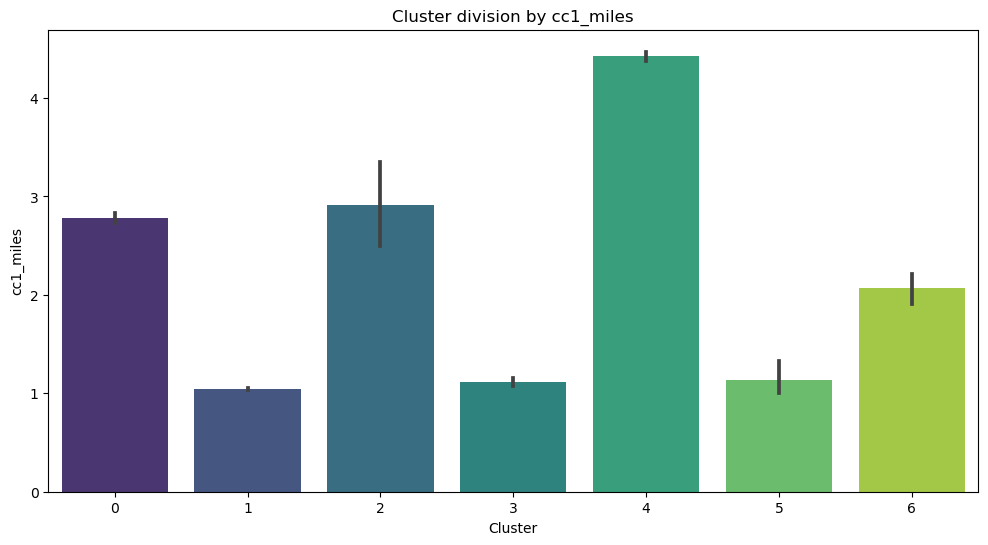

In [1069]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='cc1_miles',data=df, palette='viridis')
plt.title('Cluster division by cc1_miles')
plt.xlabel('Cluster')
plt.ylabel('cc1_miles')
plt.show()

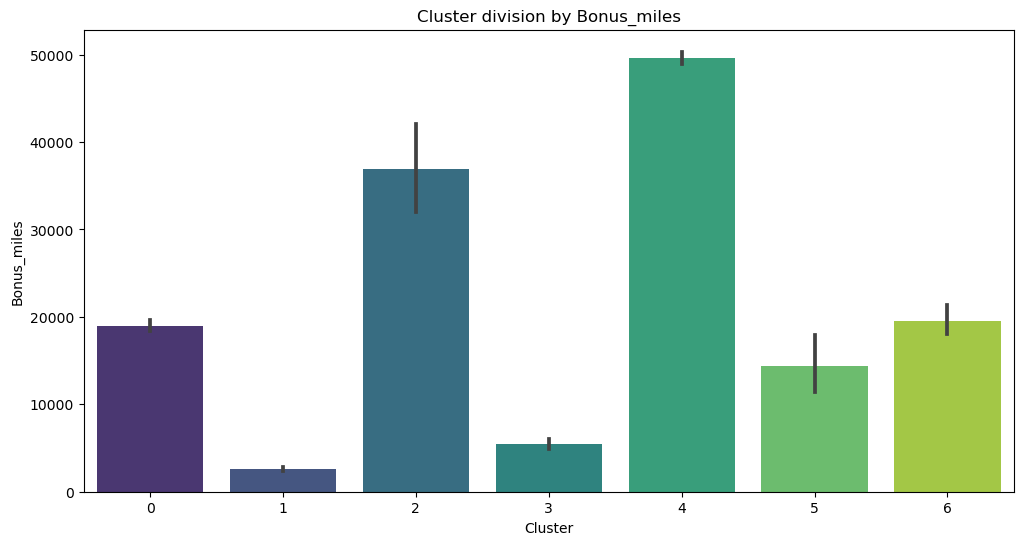

In [1071]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='Bonus_miles',data=df, palette='viridis')
plt.title('Cluster division by Bonus_miles')
plt.xlabel('Cluster')
plt.ylabel('Bonus_miles')
plt.show()

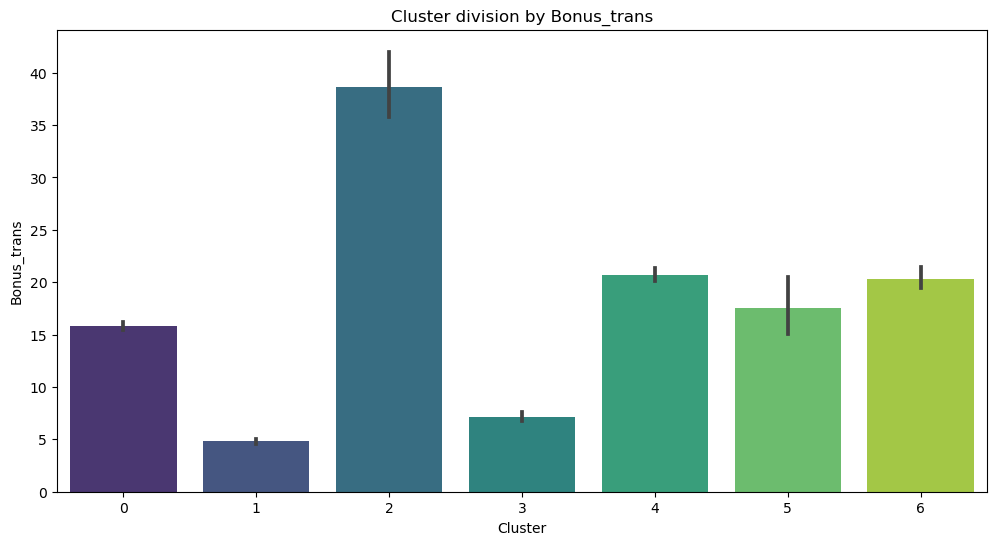

In [1073]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='Bonus_trans',data=df, palette='viridis')
plt.title('Cluster division by Bonus_trans')
plt.xlabel('Cluster')
plt.ylabel('Bonus_trans')
plt.show()

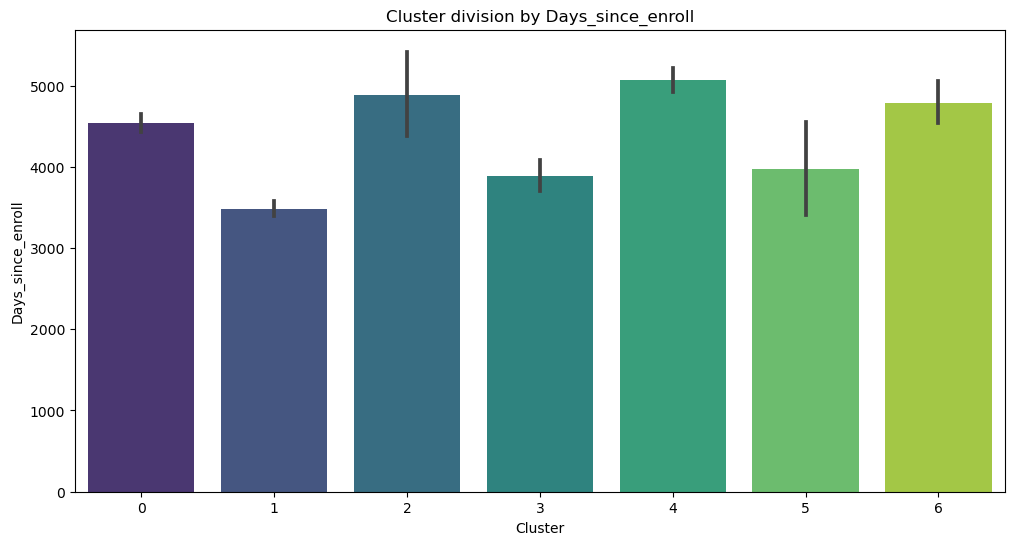

In [1075]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='Days_since_enroll',data=df, palette='viridis')
plt.title('Cluster division by Days_since_enroll')
plt.xlabel('Cluster')
plt.ylabel('Days_since_enroll')
plt.show()

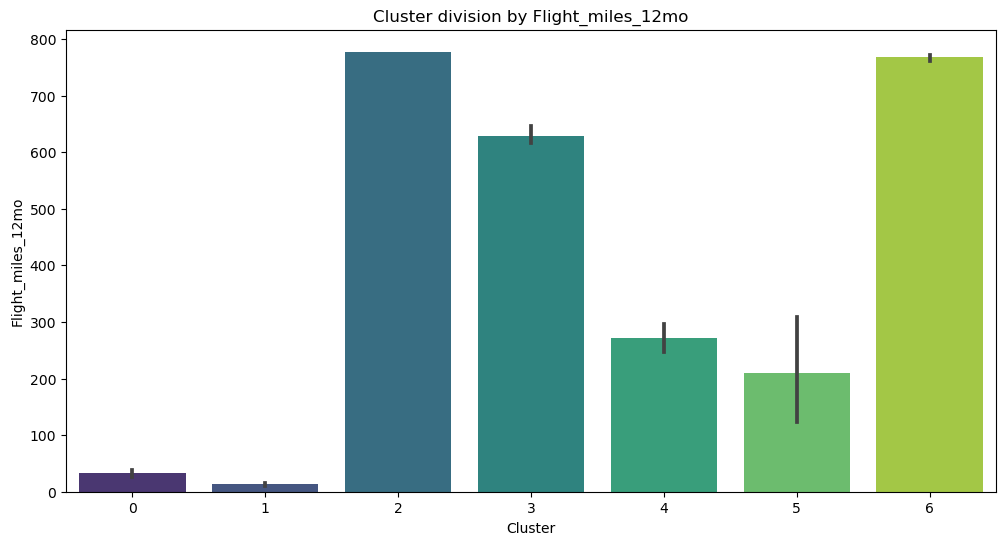

In [1077]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='Flight_miles_12mo',data=df, palette='viridis')
plt.title('Cluster division by Flight_miles_12mo')
plt.xlabel('Cluster')
plt.ylabel('Flight_miles_12mo')
plt.show()

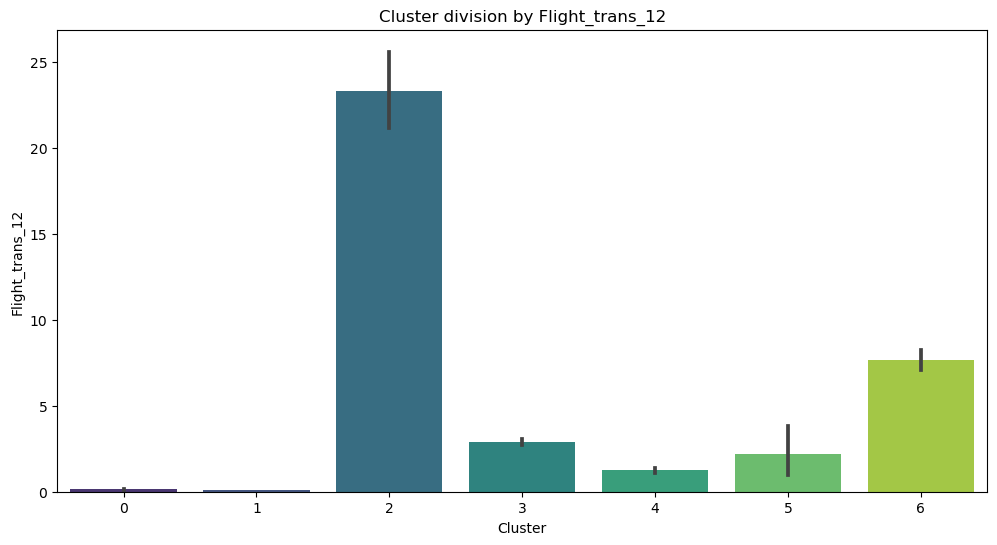

In [1079]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='Flight_trans_12',data=df, palette='viridis')
plt.title('Cluster division by Flight_trans_12')
plt.xlabel('Cluster')
plt.ylabel('Flight_trans_12')
plt.show()

## Analysis of clusters (0,1,3 & 4) -> Covers more than 90% of customers

#### Cluster 0 - 
##### 1. Contains customers with close to 10,000 miles earned with freq. flyer credit card in past 12 months. 
##### 2. Contains customers with close to 20,000 miles earned from non-flight bonus transactions in past 12 months. 
##### 3. Contains customers with 16 non-flight bonus transactions in past 12 months. 
##### 4. Contains customers with approximatey 4500 days since enrolled. 
##### 5. Contains customers with negligible flight miles in past 12 months. 
##### 6. Contains customers with negligible number of flight transactions in past 12 months. 

#### Cluster 1 - 
##### 1. Contains customers with under 5000 miles earned with freq. flyer credit card in past 12 months. 
##### 2. Contains customers with close to 2000 miles earned from non-flight bonus transactions in past 12 months. 
##### 3. Contains customers with 5 non-flight bonus transactions in past 12 months. 
##### 4. Contains customers with approximatey 3300 days since enrolled. 
##### 5. Contains customers with negligible flight miles in past 12 months. 
##### 6. Contains customers with negligible number of flight transactions in past 12 months. 

#### Cluster 3 - 
##### 1. Contains customers with close to 5000 miles earned with freq. flyer credit card in past 12 months. 
##### 2. Contains customers with close to 5000 miles earned from non-flight bonus transactions in past 12 months. 
##### 3. Contains customers with 7 non-flight bonus transactions in past 12 months. 
##### 4. Contains customers with approximatey 3700 days since enrolled. 
##### 5. Contains customers with 600+ flight miles in past 12 months. 
##### 6. Contains customers with 3 flight transactions in past 12 months. 

#### Cluster 4 - 
##### 1. Contains customers within range of 25,001 - 50,000 miles earned with freq. flyer credit card in past 12 months. 
##### 2. Contains customers with close to 50,000 miles earned from non-flight bonus transactions in past 12 months. 
##### 3. Contains customers with 20 non-flight bonus transactions in past 12 months. 
##### 4. Contains customers with approximatey 5000 days since enrolled. 
##### 5. Contains customers with 250+ flight miles in past 12 months. 
##### 6. Contains customers with 2 flight transactions in past 12 months. 

In [1096]:
# 1. From above analysis, it is clear that customers in segments 0 and 1 need different marketing strategy as these both clusters cover more than 
#    50% of data, but have shown negligible flight miles and flight transactions in past 12 months. 

# 2. Also, there are other similarities between clusters 1 and 3 which need to be addressed. From above graphs it is clear that passengers in 
#    clusters 1 and 3 are relatively newer customers and they have exhibited similar behavioral patterns with low 'miles earned with freq.
#    flyer credit card' and very low 'non-flight bonus transactions and miles earned'.

# 3. Cluster 4 customers are the frequent flyers class who have utilized the maximum benefits of freq. flyer credit card by earning more than 25,000
#    miles, about 50,000 miles earned from non-flight transactions and 250+ flight miles earned among other parameters. This segment of customers 
#    can be designated as 'Elite' which may need different management strategies for further improving services offered to them.

### 2. Hierarchical Clustering

In [722]:
from sklearn.cluster import AgglomerativeClustering

In [724]:
from scipy.cluster import hierarchy

In [726]:
# Experimenting dendrograms with different types of linkages

In [728]:
# 1. Single linkage

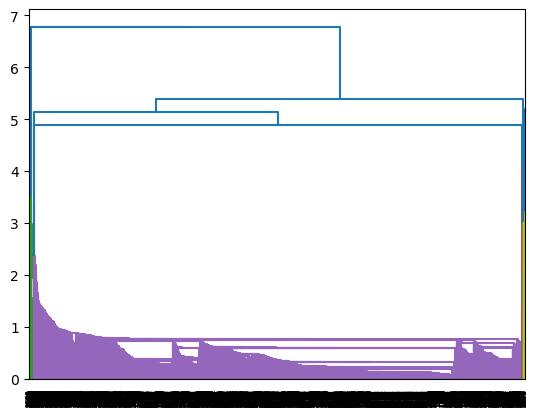

In [730]:
lk1 = hierarchy.linkage(x, method = 'single')
dendrogram1 = hierarchy.dendrogram(lk1)
plt.show()

In [732]:
# 2. Complete linkage

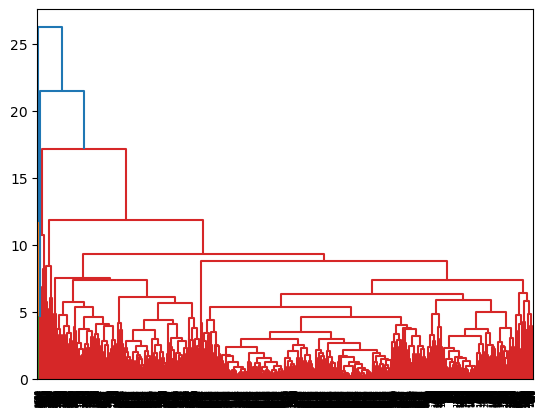

In [734]:
lk2 = hierarchy.linkage(x, method = 'complete')
dendrogram2 = hierarchy.dendrogram(lk2)
plt.show()

In [736]:
# 3. Average linkage

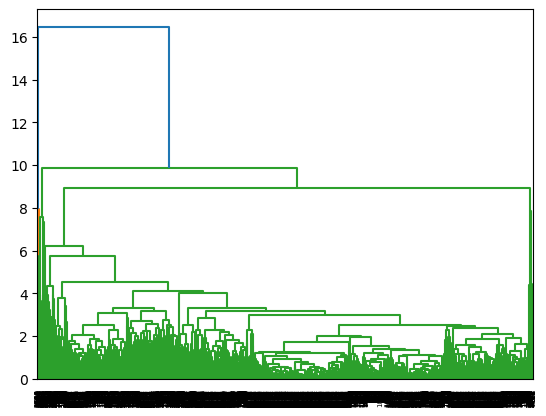

In [738]:
lk3 = hierarchy.linkage(x, method = 'average')
dendrogram3 = hierarchy.dendrogram(lk3)
plt.show()

In [740]:
# 4. Centroid linkage

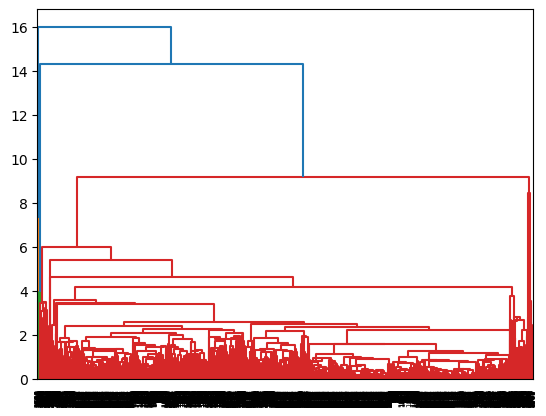

In [742]:
lk4 = hierarchy.linkage(x, method = 'centroid')
dendrogram4 = hierarchy.dendrogram(lk4)
plt.show()

In [744]:
# 5. Ward linkage

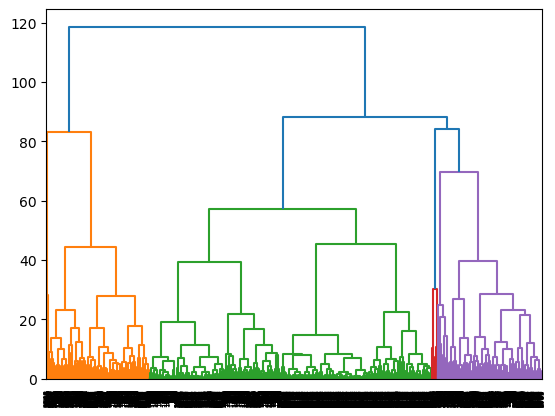

In [746]:
lk5 = hierarchy.linkage(x, method = 'ward')
dendrogram5 = hierarchy.dendrogram(lk5)
plt.show()

In [748]:
# Visualizing the clusters formed with 'Ward' linkage by plotting a dividing line.

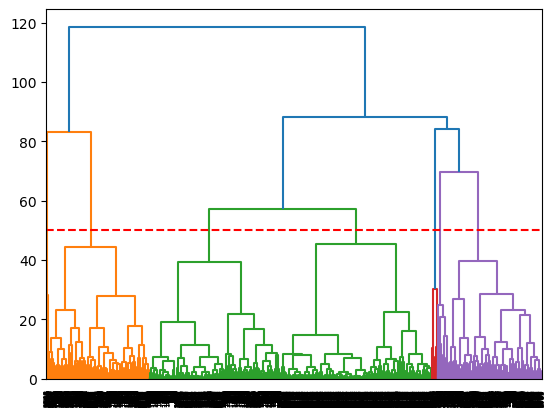

In [750]:
lk5 = hierarchy.linkage(x, method = 'ward')
dendrogram5 = hierarchy.dendrogram(lk5)
plt.axhline(y = 50, linestyle = '--', color = 'red')
plt.show()

In [914]:
# From above dendrogram with the color separation using 'Ward' linkage we can say optimum number of clusters = 5

In [754]:
hc = AgglomerativeClustering(n_clusters=5)

ypred = hc.fit_predict(x)
ypred

array([2, 2, 2, ..., 2, 0, 2], dtype=int64)

In [756]:
df['cluster'] = ypred
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,2
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,2
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,2
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,2
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,2
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,2
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,2
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [758]:
df['cluster'].value_counts()

cluster
2    2280
0     844
1     814
3      43
4      18
Name: count, dtype: int64

In [760]:
df.groupby('cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
cluster,,,,,,,,,,
0,88365.180391,0.0,1.484597,1.000000,1.000000,10845.909360,12.273697,567.903436,4.978673,4170.177725
1,112827.353194,0.0,4.235872,1.000000,1.000000,44192.773956,19.676904,231.735258,1.201474,4912.121622
2,37022.571820,0.0,1.502193,1.000000,1.000000,6550.135088,8.242982,13.436842,0.085088,3816.035088
3,55181.470930,0.0,1.139535,2.348837,1.000000,14409.773256,17.534884,208.906977,2.209302,3968.930233
4,100268.319444,0.0,3.388889,1.000000,3.722222,52595.458333,26.222222,249.027778,1.333333,4488.777778


#### Plotting graph for number of clusters = 5

In [764]:
cluster_counts = df['cluster'].value_counts().sort_index()

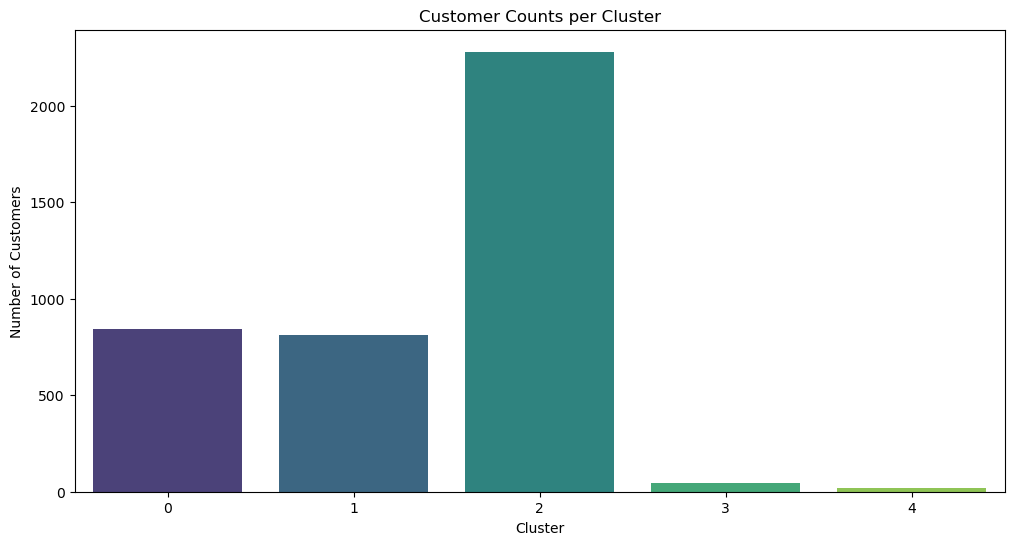

In [766]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Customer Counts per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [768]:
# Plotting scatterplot based on highly correlated features above to identify how data points are segmented into different clusters. 

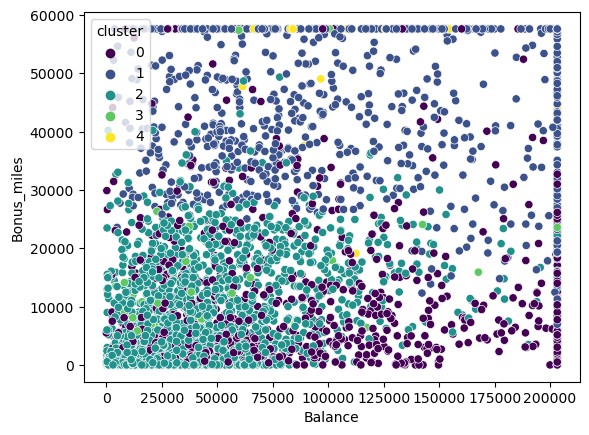

In [770]:
sns.scatterplot(x='Balance', y='Bonus_miles', data=df, hue='cluster', palette='viridis')
plt.show()

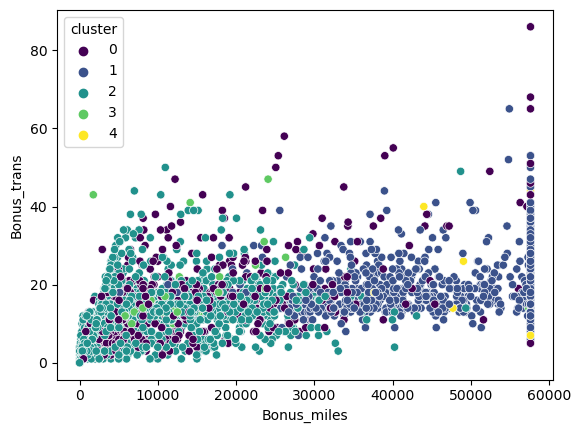

In [772]:
sns.scatterplot(x='Bonus_miles', y='Bonus_trans', data=df, hue='cluster', palette='viridis')
plt.show()

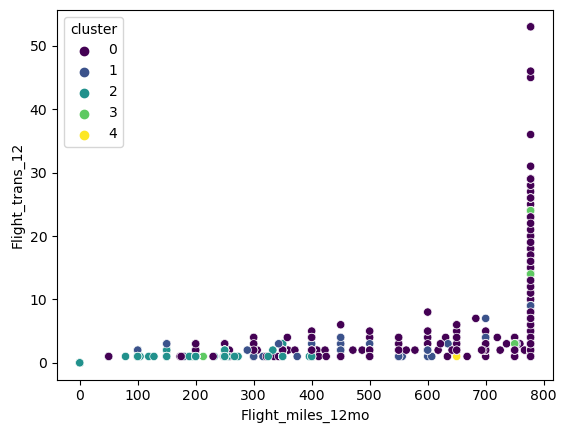

In [774]:
sns.scatterplot(x='Flight_miles_12mo', y='Flight_trans_12', data=df, hue='cluster', palette='viridis')
plt.show()

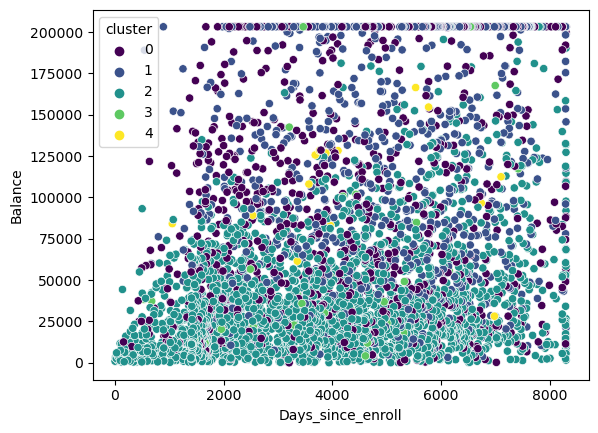

In [776]:
sns.scatterplot(x='Days_since_enroll', y='Balance', data=df, hue='cluster', palette='viridis')
plt.show()

In [778]:
# Based on dendrograms and scatterplot results, we can conclude that Hierarchical clustering does not give satisfying results with respect to 
# forming any meaningful clusters. 

In [780]:
df.drop(columns=['cluster'],inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401


### 3. DB SCAN Method

In [783]:
from sklearn.cluster import DBSCAN

In [785]:
# DBSCAN's performance is highly sensitive to its two primary hyperparameters: eps (radius) and min_samples (minimum points).
# Choosing inappropriate values for these parameters can lead to:
# 1. Overfitting: If eps is too small or min_samples is too large, you might end up with too many small clusters or noise points, 
#    potentially missing the larger underlying patterns.
# 2. Underfitting: If eps is too large or min_samples is too small, you might get too few clusters, merging distinct groups of data points
#    that should be separated.

#### Hyperparameter Tuning for DBSCAN

In [788]:
from sklearn.neighbors import NearestNeighbors

In [790]:
x.shape

(3999, 10)

In [792]:
neigh = NearestNeighbors(n_neighbors=10).fit(x)

In [794]:
neigh.kneighbors(x)

(array([[0.        , 0.12232788, 0.17709466, ..., 0.20463872, 0.21155719,
         0.21344939],
        [0.        , 0.12192438, 0.13020674, ..., 0.18466035, 0.21212337,
         0.21446771],
        [0.        , 0.2065587 , 0.22295444, ..., 0.3481491 , 0.38322328,
         0.38645319],
        ...,
        [0.        , 0.23356857, 0.33602704, ..., 0.65035733, 0.65722159,
         0.68108211],
        [0.        , 0.36229888, 0.43869416, ..., 0.59583778, 0.61752239,
         0.65126992],
        [0.        , 0.00418102, 0.01159521, ..., 0.09231599, 0.09687288,
         0.10143101]]),
 array([[   0,  378,  337, ...,  363,   14,  523],
        [   1,  363,    3, ...,    0,   14,    5],
        [   2,  338,   13, ...,  267,   98,  513],
        ...,
        [3996, 3877, 3800, ..., 3307, 2808, 3808],
        [3997, 3623, 2763, ..., 2908, 3377, 3882],
        [3998, 3491, 3455, ..., 3395, 3951, 3910]], dtype=int64))

In [796]:
d,index = neigh.kneighbors(x) #We divide 'x' array and 'index' array -> because we dont need index array for further calculations

In [798]:
d

array([[0.        , 0.12232788, 0.17709466, ..., 0.20463872, 0.21155719,
        0.21344939],
       [0.        , 0.12192438, 0.13020674, ..., 0.18466035, 0.21212337,
        0.21446771],
       [0.        , 0.2065587 , 0.22295444, ..., 0.3481491 , 0.38322328,
        0.38645319],
       ...,
       [0.        , 0.23356857, 0.33602704, ..., 0.65035733, 0.65722159,
        0.68108211],
       [0.        , 0.36229888, 0.43869416, ..., 0.59583778, 0.61752239,
        0.65126992],
       [0.        , 0.00418102, 0.01159521, ..., 0.09231599, 0.09687288,
        0.10143101]])

In [800]:
d[:,1]

array([0.12232788, 0.12192438, 0.2065587 , ..., 0.23356857, 0.36229888,
       0.00418102])

In [802]:
distance = np.sort(d[:,1])

In [804]:
distance

array([0.00000000e+00, 0.00000000e+00, 3.23865306e-03, ...,
       3.50185826e+00, 4.17673305e+00, 4.25527358e+00])

In [806]:
# d stores distances to nearest neighbors
# d[:,1] -> represents the distances to the second nearest neighbor for each data point.
# np.sort() -> This code is sorting the distances to the second nearest neighbor for each data point in your dataset.

In [808]:
# We will plot k-distance graph which helps to visually estimate an appropriate value for eps by identifying the "elbow" point in the graph.

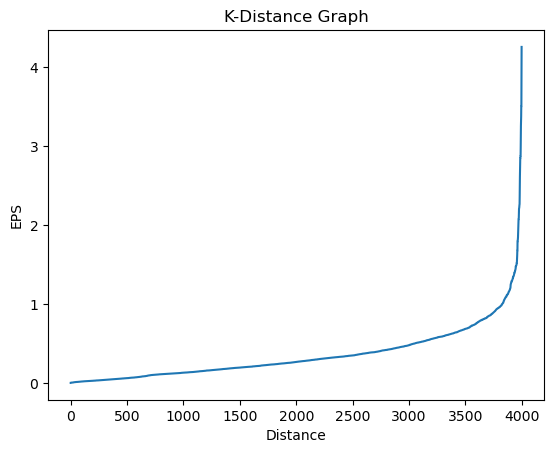

In [810]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')
plt.show()

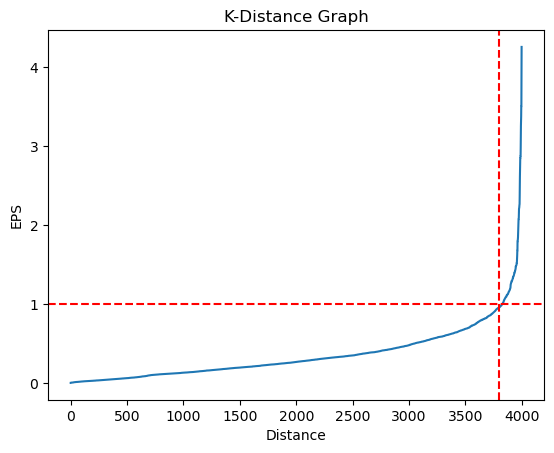

In [812]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')
plt.axhline(y=1,linestyle='--',color='red')
plt.axvline(x=3800,linestyle='--',color='red')
plt.show()

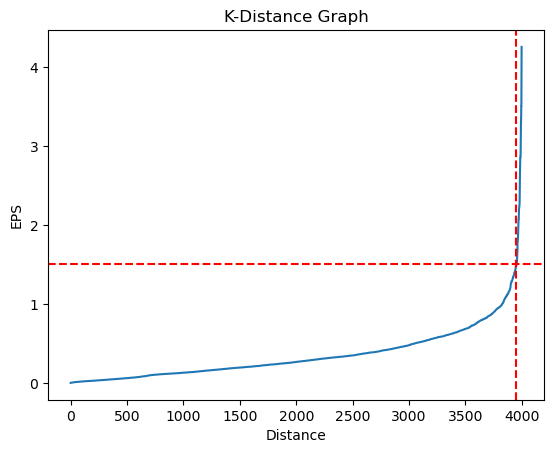

In [814]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')
plt.axhline(y=1.5,linestyle='--',color='red')
plt.axvline(x=3950,linestyle='--',color='red')
plt.show()

In [816]:
# Based on above K-distance graphs, we can see that we have to experiment with epsilon values between 1.0 and 1.5 which will ensure that
# we explore multiple epsilon values around the elbow curve. 

##### 1. eps=1.0,min_samples=10

In [819]:
db = DBSCAN(eps=1.0,min_samples=10) # epsilon=1.0 from above K-distance graph
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [821]:
df['cluster'] = yp
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,0
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,0
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,0
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,0
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,0
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,0
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [823]:
df['cluster'].value_counts()

cluster
 0    3506
-1     428
 1      30
 2      13
 4      13
 3       9
Name: count, dtype: int64

In [825]:
silhouette_score(x,yp)

0.17748694766144404

In [827]:
# We see that we are getting very low silhouette score of 0.1774 for epsilon = 1.0 and min_samples = 10.

#### 2. eps=1.0,min_samples=5

In [830]:
db = DBSCAN(eps=1.0,min_samples=5) 
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [832]:
df['cluster'] = yp
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,0
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,0
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,0
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,0
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,0
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,0
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [834]:
df['cluster'].value_counts()

cluster
 0    3708
-1     265
 2      15
 3       6
 1       5
Name: count, dtype: int64

In [836]:
silhouette_score(x,yp)

0.3839734719414613

In [838]:
# We see that we are getting a decent silhouette score of 0.3839 for epsilon = 1.0 and min_samples = 5

#### 3. eps=1.0,min_samples=4

In [841]:
db = DBSCAN(eps=1.0,min_samples=4) 
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [843]:
df['cluster'] = yp
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,0
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,0
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,0
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,0
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,0
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,0
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [845]:
df['cluster'].value_counts()

cluster
 0    3737
-1     234
 1      15
 2       6
 3       4
 4       3
Name: count, dtype: int64

In [847]:
silhouette_score(x,yp)

0.2503695098930829

In [849]:
# We see that we are getting silhouette score of 0.2503 for epsilon = 1.0 and min_samples = 4

#### 4. eps = 1.2,min_samples=5

In [852]:
db = DBSCAN(eps=1.2,min_samples=5) 
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [854]:
df['cluster'] = yp
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,0
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,0
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,0
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,0
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,0
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,0
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [856]:
df['cluster'].value_counts()

cluster
 0    3808
-1     159
 2      16
 3      10
 1       6
Name: count, dtype: int64

In [858]:
silhouette_score(x,yp)

0.4431029572212333

In [860]:
# We see that we are getting silhouette score of 0.4431 for epsilon = 1.2 and min_samples = 5

#### 5. eps=1.5,min_samples=5

In [863]:
db = DBSCAN(eps=1.5,min_samples=5) 
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [865]:
df['cluster'] = yp
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,0
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,0
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,0
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,0
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,0
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,0
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [867]:
df['cluster'].value_counts()

cluster
 0    3884
-1      86
 1      19
 2      10
Name: count, dtype: int64

In [869]:
silhouette_score(x,yp)

0.5493302526342462

In [871]:
# We see that we are getting silhouette score of 0.5493 for epsilon = 1.5 and min_samples = 5

In [873]:
# We have achieved the maximum silhouette score for epsilon = 1.5 and min_samples = 5

In [875]:
# From above results we find that increased epsilon values are giving better silhouette score, but for our case epsilon = 1.5 is the maximum value
# we can experiment with based on the K-distance graph's outputs.

# Therefore, let's experiment with increasing and decreasing min_samples to see if it improves the silhouette score further. 

#### 6. eps=1.5,min_samples=10

In [878]:
db = DBSCAN(eps=1.5,min_samples=10) 
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [880]:
df['cluster'] = yp
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,0
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,0
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,0
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,0
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,0
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,0
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [882]:
df['cluster'].value_counts()

cluster
 0    3848
-1     135
 1      16
Name: count, dtype: int64

In [884]:
silhouette_score(x,yp)

0.5432485117667991

In [886]:
# We see that with increased min_samples to 10, the silhouette score has reduced slightly to 0.5432

#### 7. eps=1.5,min_samples=3

In [889]:
db = DBSCAN(eps=1.5,min_samples=3) 
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [891]:
df['cluster'] = yp
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,0
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,0
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,0
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,0
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,0
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,0
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [893]:
df['cluster'].value_counts()

cluster
 0    3903
-1      57
 2      19
 1      10
 3       4
 5       3
 4       3
Name: count, dtype: int64

In [895]:
silhouette_score(x,yp)

0.45373408512859326

In [897]:
# We can see that silhouette score reduced drastically when we reduced min_samples to 3, indicating that we should stop experimenting further. 

#### Plotting graph for best silhouette score achieved for eps = 1.5, min_samples = 5

In [899]:
db = DBSCAN(eps=1.5,min_samples=5) 
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [901]:
df['cluster'] = yp
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1,1,1,174.0,1,0.0,0,7000,0
1,19244.0,0.0,1,1,1,215.0,2,0.0,0,6968,0
2,41354.0,0.0,1,1,1,4123.0,4,0.0,0,7034,0
3,14776.0,0.0,1,1,1,500.0,1,0.0,0,6952,0
4,97752.0,0.0,4,1,1,43300.0,26,777.5,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1,1,8525.0,4,200.0,1,1403,0
3995,64385.0,0.0,1,1,1,981.0,5,0.0,0,1395,0
3996,73597.0,0.0,3,1,1,25447.0,8,0.0,0,1402,0
3997,54899.0,0.0,1,1,1,500.0,1,500.0,1,1401,0


In [903]:
df['cluster'].value_counts()

cluster
 0    3884
-1      86
 1      19
 2      10
Name: count, dtype: int64

In [905]:
silhouette_score(x,yp)

0.5493302526342462

In [907]:
cluster_counts = df['cluster'].value_counts().sort_index()

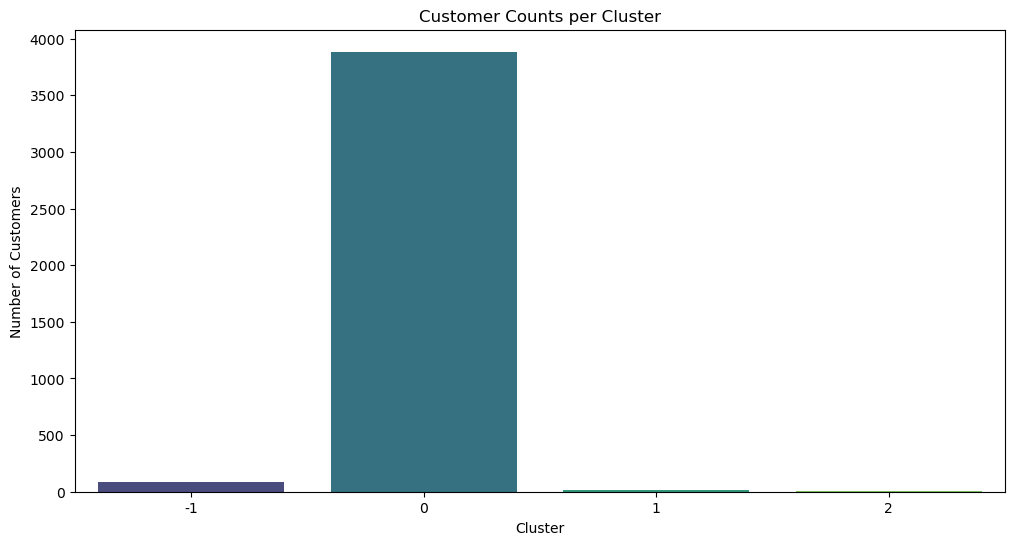

In [909]:
plt.figure(figsize=(12, 6))  
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis') 
plt.title('Customer Counts per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

## Conclusion

#### From above three different types of clustering, namely K-Means Clustering, Hierarchical Clustering and DBSCAN Clustering, we conclude that:-

#### 1. K-Means with number of clusters, k = 7, gives better cluster divisions out of all 3 clustering techniques with an average silhouette score of 0.2715

#### 2. Hierarchical clustering fails to provide clear and effective division of clusters based on dendrograms and bar plots. 

#### 3. DBSCAN clustering achieved maximum silhouette score of 0.5493 with eps = 1.5 and min_samples = 5, but it fails to provide a clear division of clusters in all it's iterations with maximum data points getting stacked in cluster '0' and for our problem statement clear division of customer segments is more important than achieving higher silhouette score. 


#### THEREFORE, WE CHOOSE K-MEANS CLUSTERING TECHNIQUE TO FORM CUSTOMER SEGMENTS.

## Analysis of clusters formed by chosen method -> K-Means Clustering (k=7)

### Analysis of clusters (0,1,3 & 4) -> Covers more than 90% of customers

#### Cluster 0 - 
##### 1. Contains customers with close to 10,000 miles earned with freq. flyer credit card in past 12 months. 
##### 2. Contains customers with close to 20,000 miles earned from non-flight bonus transactions in past 12 months. 
##### 3. Contains customers with 16 non-flight bonus transactions in past 12 months. 
##### 4. Contains customers with approximatey 4500 days since enrolled. 
##### 5. Contains customers with negligible flight miles in past 12 months. 
##### 6. Contains customers with negligible number of flight transactions in past 12 months. 

#### Cluster 1 - 
##### 1. Contains customers with under 5000 miles earned with freq. flyer credit card in past 12 months. 
##### 2. Contains customers with close to 2000 miles earned from non-flight bonus transactions in past 12 months. 
##### 3. Contains customers with 5 non-flight bonus transactions in past 12 months. 
##### 4. Contains customers with approximatey 3300 days since enrolled. 
##### 5. Contains customers with negligible flight miles in past 12 months. 
##### 6. Contains customers with negligible number of flight transactions in past 12 months. 

#### Cluster 3 - 
##### 1. Contains customers with close to 5000 miles earned with freq. flyer credit card in past 12 months. 
##### 2. Contains customers with close to 5000 miles earned from non-flight bonus transactions in past 12 months. 
##### 3. Contains customers with 7 non-flight bonus transactions in past 12 months. 
##### 4. Contains customers with approximatey 3700 days since enrolled. 
##### 5. Contains customers with 600+ flight miles in past 12 months. 
##### 6. Contains customers with 3 flight transactions in past 12 months. 

#### Cluster 4 - 
##### 1. Contains customers within range of 25,001 - 50,000 miles earned with freq. flyer credit card in past 12 months. 
##### 2. Contains customers with close to 50,000 miles earned from non-flight bonus transactions in past 12 months. 
##### 3. Contains customers with 20 non-flight bonus transactions in past 12 months. 
##### 4. Contains customers with approximatey 5000 days since enrolled. 
##### 5. Contains customers with 250+ flight miles in past 12 months. 
##### 6. Contains customers with 2 flight transactions in past 12 months. 

# CONCLUDING STATEMENTS: - 

#### 1. From above analysis, it is clear that customers in segments 0 and 1 need different marketing strategy as these both clusters cover more than 50% of customers, but have shown negligible flight miles and flight transactions in past 12 months. 

#### 2. Also, there are other similarities between clusters 1 and 3 which need to be addressed. From above graphs it is clear that passengers in clusters 1 and 3 are relatively newer customers and they have exhibited similar behavioral patterns with low 'miles earned with freq.flyer credit card' and very low 'non-flight bonus transactions and miles earned'.

#### 3. Cluster 4 customers are the frequent flyers class who have utilized the maximum benefits of freq. flyer credit card by earning more than 25,000 miles, about 50,000 miles earned from non-flight bonus transactions and 250+ flight miles earned among other parameters. This segment of customers can be designated as 'Elite' which may need different management strategies for further improving services offered to them.